# Python для анализа данных

*Алла Тамбовцева, НИУ ВШЭ*


## Библиотека pandas. Продолжение.

### Группировка и агрегирование: методы `.groupby()` и `.agg()`

Часто случается, что данные необходимо сгруппировать по какому-то признаку – по значениям определенной переменной. На входе имеется таблица (датафрейм), а на выходе хочется получить несколько таблиц: отдельная таблица для каждого значения. Давайте рассмотрим такой пример. У нас есть база данных с результатами выборов, и нам нужно сгруппировать данные по регионам. 

Для начала импортируем библиотеку pandas и загрузим файл с данными.

In [1]:
import pandas as pd

In [28]:
df = pd.read_csv("elect_.csv", encoding = "UTF-8")

In [30]:
df.shape

(89994, 34)

В таблице сохранены результаты выборов президента России 2012 года. 

In [31]:
df.head()

,link,uik,kom1,kom2,kom3,kom4,kom5,1,2,3,...,18,19,20,21,22,23,а,б,в,г
0,http://www.adygei.vybory.izbirkom.ru/region/ad...,1,Республика Адыгея (Адыгея),Адыгейская,УИК №1,NaN,NaN,2383.0,2147.0,0.0,...,0.0,24.0,382.0,28.0,71.0,1066.0,NaN,NaN,NaN,NaN
1,http://www.adygei.vybory.izbirkom.ru/region/ad...,2,Республика Адыгея (Адыгея),Адыгейская,УИК №2,NaN,NaN,2865.0,2586.0,0.0,...,0.0,51.0,453.0,49.0,104.0,1174.0,NaN,NaN,NaN,NaN
2,http://www.adygei.vybory.izbirkom.ru/region/ad...,3,Республика Адыгея (Адыгея),Адыгейская,УИК №3,NaN,NaN,2821.0,2558.0,0.0,...,0.0,36.0,481.0,24.0,107.0,1025.0,NaN,NaN,NaN,NaN
3,http://www.adygei.vybory.izbirkom.ru/region/ad...,4,Республика Адыгея (Адыгея),Адыгейская,УИК №4,NaN,NaN,2069.0,1868.0,0.0,...,0.0,0.0,414.0,0.0,48.0,784.0,NaN,NaN,NaN,NaN
4,http://www.adygei.vybory.izbirkom.ru/region/ad...,5,Республика Адыгея (Адыгея),Адыгейская,УИК №5,NaN,NaN,777.0,705.0,0.0,...,0.0,19.0,138.0,4.0,7.0,286.0,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89994 entries, 0 to 89993
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   link    89994 non-null  object 
 1   uik     89994 non-null  int64  
 2   kom1    89994 non-null  object 
 3   kom2    89994 non-null  object 
 4   kom3    89609 non-null  object 
 5   kom4    0 non-null      float64
 6   kom5    0 non-null      float64
 7   1       89994 non-null  float64
 8   2       89994 non-null  float64
 9   3       89994 non-null  float64
 10  4       89994 non-null  float64
 11  5       89994 non-null  float64
 12  6       89994 non-null  float64
 13  7       89994 non-null  float64
 14  8       89994 non-null  float64
 15  9       89994 non-null  float64
 16  10      89994 non-null  float64
 17  11      89994 non-null  float64
 18  12      89994 non-null  float64
 19  13      89994 non-null  float64
 20  14      89994 non-null  float64
 21  15      89994 non-null  float64
 22

Таблица достаточно большая, поэтому давайте выберем те столбцы, которые понадобятся нам для работы. Какие именно? Столбцы в этой базе имеют порядковый номер строки в таблице на [сайте](http://www.vybory.izbirkom.ru/region/region/izbirkom?action=show&root=1&tvd=100100031793509&vrn=100100031793505&region=0&global=1&sub_region=0&prver=0&pronetvd=null&vibid=100100031793509&type=227) Центральной избирательной комиссии.

Выберем столбцы, которые соответствуют регионам, а также следующим показателям: общее число зарегистрированных избирателей, число недействительных бюллетеней, число действительных бюллетеней, число голосов за Жириновского, Зюганова, Миронова, Прохорова и Путина.

In [57]:
d = df[["kom1", "1", "9", "10", "19", "20", "21", "22", "23"]]

In [58]:
d.head()

,kom1,1,9,10,19,20,21,22,23
0,Республика Адыгея (Адыгея),2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


Теперь присвоим столбцам более информативные названия:

In [59]:
d.columns

Index(['kom1', '1', '9', '10', '19', '20', '21', '22', '23'], dtype='object')

In [60]:
d.columns = ["region", "total", "invalid", "valid", "Zh", "Zu", "Mi", "Pr", "Pu"]

In [61]:
d.head() # опять посмотрим

,region,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
0,Республика Адыгея (Адыгея),2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


Посмотрим теперь, какие регионы есть в базе. Выбрать столбец *region* в таком случае будет не совсем удачно, поскольку в нем будет много повторяющихся значений. Посмотрим только на уникальные:

In [62]:
d['region'].value_counts()

Республика Башкортостан                  3509
Московская область                       3388
Город Москва                             3386
Краснодарский край                       2713
Ростовская область                       2594
                                         ... 
Республика Ингушетия                      130
Магаданская область                       103
Чукотский автономный округ                 57
Ненецкий автономный округ                  51
Город Байконур (Республика Казахстан)       7
Name: region, Length: 80, dtype: int64

Сгруппируем данные по регионам и посчитаем для каждого региона явку в процентах и процент голосов за каждого кандидата. Группировка осуществляется с помощью метода `.groupby()`.

In [63]:
d.groupby('region')[['total']].mean()

,total
region,
Алтайский край,1053.344791
Амурская область,845.874840
Архангельская область,1004.754065
Астраханская область,1313.324232
Белгородская область,968.472000
...,...
Хабаровский край,1267.857143
Челябинская область,1228.453898
Чувашская Республика - Чувашия,811.710884


В таком виде метод `.groupby()` дает нам немного. Мы же хотим не просто получать отдельные таблицы, а агрегировать данные по регионам ‒ суммировать все показатели (число избирателей, бюллетеней, голосов) по каждому региону. Тут на помощь придет метод `.agg()`, который выполняет агрегирование по группам.

In [64]:
d.groupby('region')[['total']].sum()

,total
region,
Алтайский край,1961328.0
Амурская область,662320.0
Архангельская область,988678.0
Астраханская область,769608.0
Белгородская область,1210590.0
...,...
Хабаровский край,1056125.0
Челябинская область,2757879.0
Чувашская Республика - Чувашия,954572.0


In [65]:
d.groupby('region')[['total']].agg(['sum', 'mean', 'min', 'max', 'median'])

total                                    
                                       sum         mean    min     max  median
region                                                                        
Алтайский край                   1961328.0  1053.344791   23.0  3053.0   823.0
Амурская область                  662320.0   845.874840    7.0  2949.0   523.0
Архангельская область             988678.0  1004.754065    7.0  2960.0   581.5
Астраханская область              769608.0  1313.324232   10.0  2946.0  1283.5
Белгородская область             1210590.0   968.472000   46.0  3044.0   802.0
...                                    ...          ...    ...     ...     ...
Хабаровский край                 1056125.0  1267.857143   10.0  3240.0  1243.0
Челябинская область              2757879.0  1228.453898   39.0  3270.0  1236.0
Чувашская Республика - Чувашия    954572.0   811.710884   35.0  2968.0   466.0
Чукотский автономный округ         35968.0   631.017544   45.0  2535.0   314.0
Ямало-Ненецкий автономный округ   358834.0  1700.635071  159.0  3966.0  1884.0

[80 rows x 5 columns]

Сначала в `.groupby()` мы указали переменную, по которой нужно выполнить группировку, затем в `.agg()` мы указали функцию, которую нужно выполнить. В нашем случае это `'sum'`, поскольку нам нужно просто сложить все показатели в пределах одного региона. Применять можно и другие функции, например, считать среднее:

In [71]:
d.groupby('region') \
.agg('mean', numeric_only=True) \
.head(10)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
region,,,,,,,,
Алтайский край,1053.344791,6.446831,624.825994,52.610634,140.529001,24.641783,44.993555,362.051020
Амурская область,845.874840,6.012771,504.464879,50.724138,86.121328,17.361430,29.463602,320.794381
Архангельская область,1004.754065,5.611789,578.752033,52.001016,93.138211,33.763211,61.085366,338.764228
Астраханская область,1313.324232,8.715017,729.515358,37.402730,115.464164,31.732082,37.325939,507.590444
Белгородская область,968.472000,8.167200,711.811200,47.648800,168.863200,28.480800,39.845600,426.972800
Брянская область,929.789146,6.158363,616.482206,38.233096,130.195730,20.865658,28.595196,398.592527
Владимирская область,1278.908511,9.025532,669.708511,57.037234,140.851064,44.569149,64.164894,363.086170
Волгоградская область,1212.011494,7.680581,765.710829,53.029038,145.794313,33.469449,43.038113,490.379915
Вологодская область,949.590385,6.342308,578.845192,47.588462,89.824038,38.755769,54.869231,347.807692


Или сразу несколько статистик. которые можно указать в `.agg()` в виде списка.

In [73]:
d.groupby('region').agg(['mean', 'median']).head().T # среднее и медиана

region          Алтайский край  Амурская область  Архангельская область  \
total   mean       1053.344791        845.874840            1004.754065   
        median      823.000000        523.000000             581.500000   
invalid mean          6.446831          6.012771               5.611789   
        median        4.000000          4.000000               2.000000   
valid   mean        624.825994        504.464879             578.752033   
        median      495.000000        326.000000             332.500000   
Zh      mean         52.610634         50.724138              52.001016   
        median       41.000000         31.000000              29.000000   
Zu      mean        140.529001         86.121328              93.138211   
        median      109.500000         52.000000              44.000000   
Mi      mean         24.641783         17.361430              33.763211   
        median       15.000000          9.000000              19.000000   
Pr      mean         44.993555         29.463602              61.085366   
        median       22.000000         12.000000              20.500000   
Pu      mean        362.051020        320.794381             338.764228   
        median      305.500000        224.000000             230.500000   

region          Астраханская область  Белгородская область  
total   mean             1313.324232              968.4720  
        median           1283.500000              802.0000  
invalid mean                8.715017                8.1672  
        median              6.000000                6.0000  
valid   mean              729.515358              711.8112  
        median            692.500000              633.0000  
Zh      mean               37.402730               47.6488  
        median             31.000000               41.0000  
Zu      mean              115.464164              168.8632  
        median            100.500000              140.5000  
Mi      mean               31.732082               28.4808  
        median             22.000000               21.0000  
Pr      mean               37.325939               39.8456  
        median             22.000000               22.0000  
Pu      mean              507.590444              426.9728  
        median            480.000000              397.0000

Кроме того, внутри `.agg()` можно указывать свои функции. Например, нас интересует разница между максимальным и минимальным значением. Сначала напишем функцию `my_diff`, которая будет определять такую разность:

In [74]:
def my_diff(x):
    return max(x) - min(x)

Проверим, как она работает:

In [75]:
my_diff([4, 6, 8]) # все верно, 8 - 4 = 4

4

Теперь используем эту функцию внутри `.agg()`:

In [76]:
max(d['total'])

19711.0

In [80]:
d.groupby('region').agg([my_diff,'min','max']).head().T # везде смотрим на первые 5 строк

region           Алтайский край  Амурская область  Архангельская область  \
total   my_diff          3030.0            2942.0                 2953.0   
        min                23.0               7.0                    7.0   
        max              3053.0            2949.0                 2960.0   
invalid my_diff            72.0             130.0                   76.0   
        min                 0.0               0.0                    0.0   
        max                72.0             130.0                   76.0   
valid   my_diff          2389.0            1773.0                 1951.0   
        min                15.0               7.0                    7.0   
        max              2404.0            1780.0                 1958.0   
Zh      my_diff           379.0             267.0                  232.0   
        min                 0.0               0.0                    0.0   
        max               379.0             267.0                  232.0   
Zu      my_diff           573.0             404.0                  407.0   
        min                 0.0               0.0                    0.0   
        max               573.0             404.0                  407.0   
Mi      my_diff           131.0              92.0                  153.0   
        min                 0.0               0.0                    0.0   
        max               131.0              92.0                  153.0   
Pr      my_diff           351.0             197.0                  369.0   
        min                 0.0               0.0                    0.0   
        max               351.0             197.0                  369.0   
Pu      my_diff          1639.0            1201.0                 1205.0   
        min                 9.0               3.0                    1.0   
        max              1648.0            1204.0                 1206.0   

region           Астраханская область  Белгородская область  
total   my_diff                2936.0                2998.0  
        min                      10.0                  46.0  
        max                    2946.0                3044.0  
invalid my_diff                 223.0                  71.0  
        min                       0.0                   0.0  
        max                     223.0                  71.0  
valid   my_diff                1862.0                2118.0  
        min                      10.0                  42.0  
        max                    1872.0                2160.0  
Zh      my_diff                 209.0                 234.0  
        min                       0.0                   0.0  
        max                     209.0                 234.0  
Zu      my_diff                 411.0                 612.0  
        min                       1.0                   0.0  
        max                     412.0                 612.0  
Mi      my_diff                 157.0                 108.0  
        min                       0.0                   0.0  
        max                     157.0                 108.0  
Pr      my_diff                 234.0                 335.0  
        min                       0.0                   0.0  
        max                     234.0                 335.0  
Pu      my_diff                1367.0                1268.0  
        min                       1.0                  19.0  
        max                    1368.0                1287.0

Всё, что мы пока сделали, очень интересно, но есть проблема: все данные пока даны в абсолютных значениях, не в процентах. Это неудобно. Давайте сгруппируем данные по региону и добавим в базу с агрегированными данными новые столбцы: явка в процентах и проценты голосов за каждого кандидата.

Для этого необходимо вспомнить, как считается явка и проценты голосов. Явка считается так: суммируем число действительных и недействительных бюллетеней. Чтобы получить явку в процентах, делим явку на общее число зарегистрированных избирателей и домножаем на $100$, чтобы перевести долю в проценты. Проценты голосов за кандидатов считаем от явки, берем число голосов за кандидата, делим на явку и домножаем на $100$. Проделаем это поэтапно. 

Сначала сохраним результат агрегирования в переменную `regs` и добавим новый столбец для явки в абсолютных значениях (в голосах).

In [81]:
regs = d.groupby('region').agg('sum', numeric_only=True)

regs["turnout"] = regs.invalid + regs.valid # новый столбец - сумма двух старых

In [82]:
regs

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout
region,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0,432603.0
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0,899973.0
...,...,...,...,...,...,...,...,...,...
Хабаровский край,1056125.0,8733.0,645264.0,68500.0,115436.0,31944.0,62145.0,367239.0,653997.0
Челябинская область,2757879.0,25366.0,1704033.0,97869.0,254542.0,88177.0,138907.0,1124538.0,1729399.0
Чувашская Республика - Чувашия,954572.0,10465.0,692492.0,39707.0,144676.0,31201.0,38838.0,438070.0,702957.0


In [83]:
d.head()

,region,total,invalid,valid,Zh,Zu,Mi,Pr,Pu
0,Республика Адыгея (Адыгея),2383.0,19.0,1571.0,24.0,382.0,28.0,71.0,1066.0
1,Республика Адыгея (Адыгея),2865.0,29.0,1831.0,51.0,453.0,49.0,104.0,1174.0
2,Республика Адыгея (Адыгея),2821.0,31.0,1673.0,36.0,481.0,24.0,107.0,1025.0
3,Республика Адыгея (Адыгея),2069.0,0.0,1246.0,0.0,414.0,0.0,48.0,784.0
4,Республика Адыгея (Адыгея),777.0,8.0,454.0,19.0,138.0,4.0,7.0,286.0


In [84]:
regs.head()

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout
region,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0,432603.0
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0,899973.0


Теперь добавим столбец с явкой в процентах:

In [85]:
regs["turnout_perc"] = regs.turnout / regs.total * 100

In [86]:
regs.head(3)

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc
region,,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0,59.930313
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0,60.349076
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886


In [92]:
regs['turnout_perc'].quantile(.1)

58.22267159495432

In [93]:
regs[regs['turnout_perc'] < regs['turnout_perc'].quantile(.1)]

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc
region,,,,,,,,,,
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0,432603.0,56.210824
Владимирская область,1202174.0,8484.0,629526.0,53615.0,132400.0,41895.0,60315.0,341301.0,638010.0,53.071352
Город Москва,7309869.0,87698.0,4159740.0,267418.0,814573.0,214703.0,868736.0,1994310.0,4247438.0,58.105528
Иркутская область,1915179.0,12186.0,1060537.0,88419.0,242097.0,41152.0,94008.0,594861.0,1072723.0,56.011631
Пермский край,2124064.0,16562.0,1153647.0,53879.0,184639.0,51535.0,127098.0,736496.0,1170209.0,55.092926
Республика Карелия,558774.0,3839.0,305600.0,26579.0,50957.0,18886.0,37798.0,171380.0,309439.0,55.378203
Сахалинская область,398893.0,2846.0,225504.0,20016.0,45730.0,8856.0,22337.0,128565.0,228350.0,57.245928


Осталось проделать аналогичные операции для голосов за разных кандидатов. Но повторять одно и то же пять раз не хочется (а что бы мы делали, если бы кандидатов было больше?). Давайте напишем функцию, которая будет принимать на вход столбец, делить все его значения на значения из столбца *turnout* и переводить все в проценты.

In [97]:
def to_perc(x):
    return x / regs.turnout * 100

А теперь выберем из базы данных столбцы с голосами за кандидатов и применим к ним нашу функцию.

In [98]:
perc = regs[['Zh' ,'Zu', 'Mi', 'Pr', 'Pu']].apply(to_perc, axis = 0)
# axis = 0 - по столбцам, не по строкам 

In [99]:
perc.head(3)

,Zh,Zu,Mi,Pr,Pu
region,,,,,
Алтайский край,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,8.898740,15.938395,5.777772,10.453311,57.971458


Нужно переименовать столбцы в базе `perc`. Давайте сделаем это по-умному: возьмем названия столбцов в `perc` и приклеим к ним часть с `_perc`, чтобы названия столбцов с показателями в процентах отличались от показателей в абсолютных числах.

In [100]:
old_cols = list(perc.columns)
old_cols

['Zh', 'Zu', 'Mi', 'Pr', 'Pu']

In [102]:
new_cols = [x + "_perc" for x in old_cols]
new_cols

['Zh_perc', 'Zu_perc', 'Mi_perc', 'Pr_perc', 'Pu_perc']

In [103]:
perc.columns = new_cols

In [104]:
perc.head(3)

,Zh_perc,Zu_perc,Mi_perc,Pr_perc,Pu_perc
region,,,,,
Алтайский край,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,8.898740,15.938395,5.777772,10.453311,57.971458


Ура! Последний аккорд: соединим нашу таблицу `regs` с таблицей `perc`, чтобы все показатели были в одном месте. Способов объединять датафреймы много, но давайте обсудим их в следующий раз. А пока просто склеим две таблицы по столбцам с помощью метода `.concat()`.

In [105]:
final = pd.concat([regs, perc], axis = 1) # axis = 1 - по столбцам

In [106]:
final.head()

,total,invalid,valid,Zh,Zu,Mi,Pr,Pu,turnout,turnout_perc,Zh_perc,Zu_perc,Mi_perc,Pr_perc,Pu_perc
region,,,,,,,,,,,,,,,
Алтайский край,1961328.0,12004.0,1163426.0,97961.0,261665.0,45883.0,83778.0,674139.0,1175430.0,59.930313,8.334056,22.261215,3.903508,7.127434,57.352543
Амурская область,662320.0,4708.0,394996.0,39717.0,67433.0,13594.0,23070.0,251182.0,399704.0,60.349076,9.936603,16.870734,3.401017,5.771771,62.842003
Архангельская область,988678.0,5522.0,569492.0,51169.0,91648.0,33223.0,60108.0,333344.0,575014.0,58.159886,8.898740,15.938395,5.777772,10.453311,57.971458
Астраханская область,769608.0,5107.0,427496.0,21918.0,67662.0,18595.0,21873.0,297448.0,432603.0,56.210824,5.066539,15.640668,4.298398,5.056137,68.757729
Белгородская область,1210590.0,10209.0,889764.0,59561.0,211079.0,35601.0,49807.0,533716.0,899973.0,74.341685,6.618087,23.453926,3.955785,5.534277,59.303557


Приличную базу мы получили, можно перейти к чему-то более содержательному.

### Ещё немного про визуализацию данных

https://www.geogebra.org/m/KE6JfuF9

В прошлый раз мы познакомились с тем, как строить графики для переменных в базе данных. Мы уже обсудили два типа графиков для количественных данных: гистограмму и ящик с усами. Давайте посмотрим на диаграммы рассеяния – графики, которые позволяют увидеть совместное распределение пары количественных показателей. 

In [107]:
import matplotlib
%matplotlib inline 

А теперь сама диаграмма рассеяния (*scatterplot*) для показателей *явка в процентах* и *процент за Зюганова*:

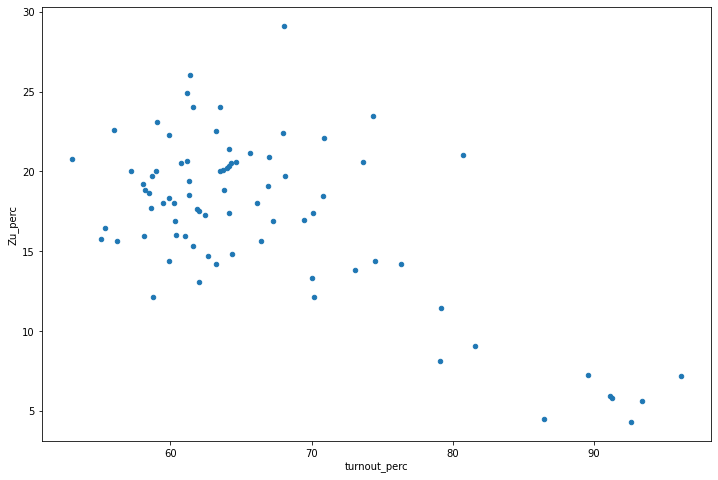

In [110]:
final.plot.scatter('turnout_perc', 'Zu_perc', figsize = (12, 8));

Можем привести график в порядок. Добавить заголовок и подписи к осям, плюс, изменить цвет точек. Для этого основной график сохраним в переменную `ax`, а затем применим к ней методы, которые отвечают за добавление заголовка и названиям осей *x* и *y*. 

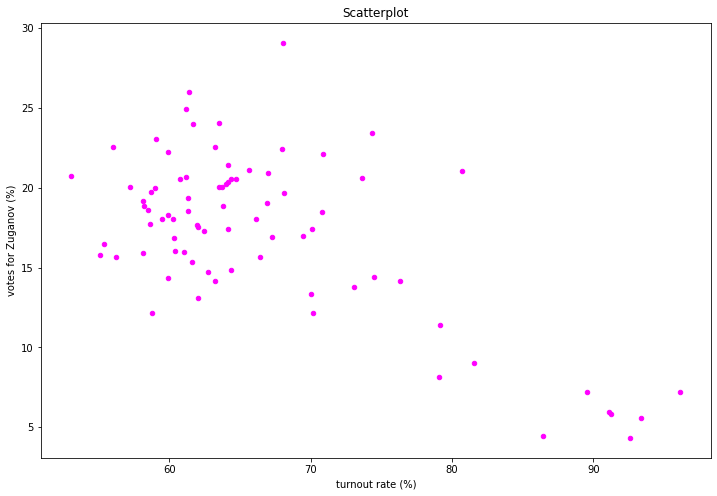

In [113]:
ax = final.plot.scatter('turnout_perc', 'Zu_perc', figsize = (12, 8), color = "magenta") # цвет magenta
ax.set_title('Scatterplot') # заголовок для объекта ax
ax.set_xlabel('turnout rate (%)') # подпись для оси x
ax.set_ylabel('votes for Zuganov (%)'); # подпись для оси y

По графику видно, что, в целом, чем выше явка, тем ниже процент голосов за Зюганова. Углубляться в разные настройки графиков и в статистику не будем, но познакомимся с примером графика средствами библиотеки pandas. Построим матрицу диаграмм рассеяния (*scatterplot matrix*), сетку с диаграммами рассеяния для всех пар показателей.

Логично будет строить такой график для переменных в базе `perc`, поскольку правильнее смотреть на связи между показателями в процентах.

In [114]:
from pandas.plotting import scatter_matrix # импортируем функцию

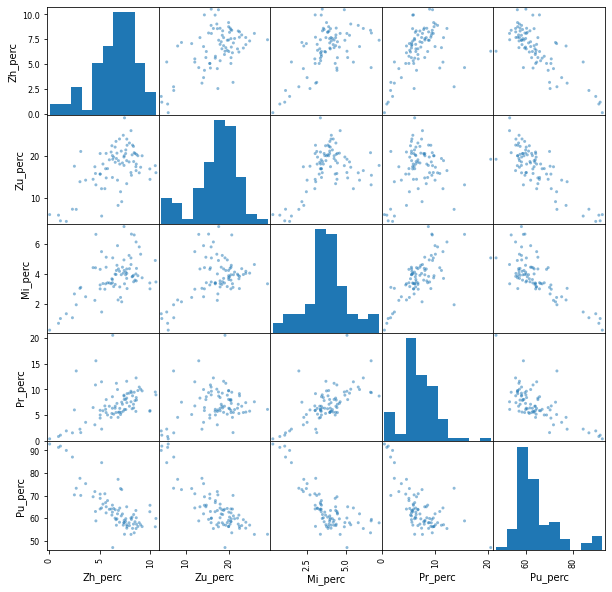

In [115]:
scatter_matrix(perc, diagonal='hist', figsize=(10, 10)); # строим график

Аргумент `diagonal` отвечает за тип графика, который будет находиться на диагонали (в нашем случае гистограмма – `'hist'`), а аргумент `figsize` – за размер графика (по горизонтали и по вертикали). На диагоналях также можно построить сглаженные графики плотности распределения показателей:

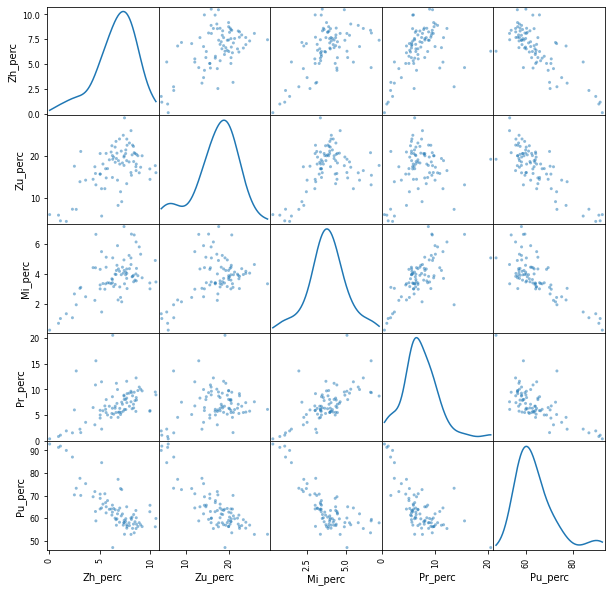

In [116]:
scatter_matrix(perc, diagonal='kde', figsize=(10, 10)); # kde - от kernel density estimation

Поиграем с цветами. Изменим цвет точек на всех диаграммах рассеяния:

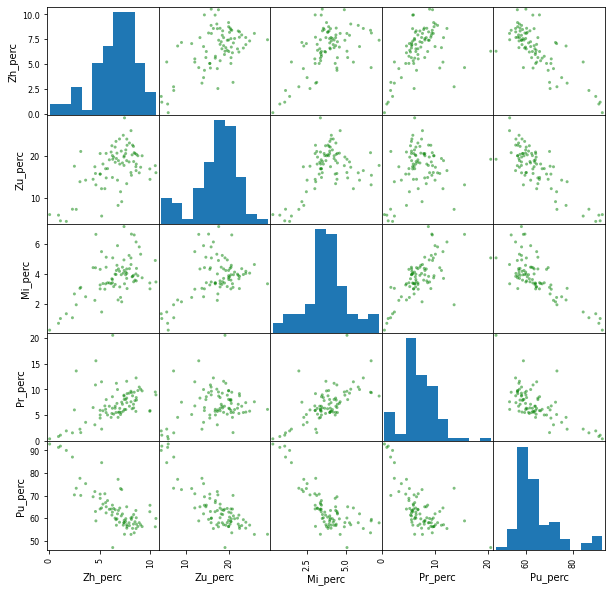

In [117]:
x = scatter_matrix(perc, diagonal='hist', figsize=(10, 10), color='green')

А теперь цвет гистограмм. Это сделать чуть сложнее, поскольку нужно задавать значения аргуметов как `**kwargs`, в виде словаря:

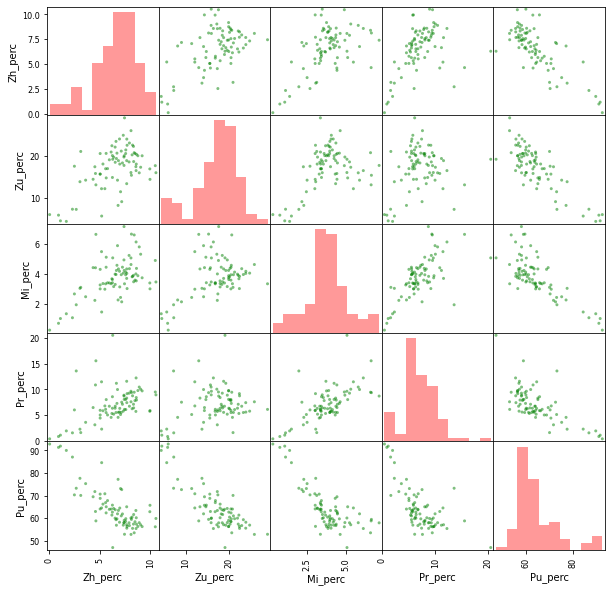

In [132]:
# заодно выставим чило столбцов - bins=10
# и прозрачность 50% - alpha=0.5

x = scatter_matrix(perc, diagonal='hist', figsize=(10, 10), color='green', 
               hist_kwds = {'color': 'red', 'bins' : 10, 'alpha' : 0.4})

# for i in range(5):
#     for j in range(5):
#         x[i,j].set_xlim(0,100)
#         if i != j:
#              x[i,j].set_ylim(0,100)

На этом пока всё.